In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

CSV_FILE = "../../data/data.csv"
employee_data = pd.read_csv(CSV_FILE)

In [2]:
employee_data.head(2)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille


In [3]:
employee_data.shape

(9582, 6)

In [4]:
for col in employee_data.columns:
    print(f"Column: {col}")
    print(f"Data type: {employee_data[col].dtype}")

Column: Entreprise
Data type: object
Column: Metier
Data type: object
Column: Technologies
Data type: object
Column: Diplome
Data type: object
Column: Experience
Data type: object
Column: Ville
Data type: object


In [5]:
employee_data['Experience'] = pd.to_numeric(employee_data['Experience'], errors='coerce')

In [6]:
missing = employee_data.isnull().sum()
percent = (missing / len(employee_data)) * 100
summary = pd.DataFrame({
        'Missing Values': missing,
        'Percent (%)': percent
    })

summary

,Missing Values,Percent (%)
Entreprise,17,0.177416
Metier,19,0.198288
Technologies,0,0.000000
Diplome,0,0.000000
Experience,3814,39.803799
Ville,0,0.000000


In [7]:
categorical_columns = employee_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"Colonne : {col}")
    print("Top valeurs :")
    print(employee_data[col].value_counts().head(5))
    print(f"Nombre de valeurs uniques : {employee_data[col].nunique()}")
    print("-" * 40)

Colonne : Entreprise
Top valeurs :
Entreprise
Ball Aerospace                     748
KPMG                               132
Amazon.com                         127
Brigham & Women's Hospital(BWH)    115
Google                             112
Name: count, dtype: int64
Nombre de valeurs uniques : 1382
----------------------------------------
Colonne : Metier
Top valeurs :
Metier
Data scientist         3865
Data engineer          2347
Data architecte        2123
Lead data scientist    1228
Name: count, dtype: int64
Nombre de valeurs uniques : 4
----------------------------------------
Colonne : Technologies
Top valeurs :
Technologies
SQL/R/Python//Big data                                539
SAS/Teradata/SQL/R/Python/Machine learning/Anglais    458
C++/R/Python/Matlab/Matplotlib                        273
SPSS/Excel/SAS/R/machine learning/AI/Scoring          250
Hadoop/Hive/Vertica/Tableau                           250
Name: count, dtype: int64
Nombre de valeurs uniques : 57
---------------

# Descriptive analysis

## 1. Décrivez la variable Expérience (moyenne, médiane, écart-type, minimum, maximum) puis développez une rapide analyse pour expliquer ces valeurs dans ce contexte.

In [8]:
# Statistiques descriptives pour la variable "Experience"
exp = employee_data['Experience']
mean_exp = np.mean(exp)
median_exp = np.nanmedian(exp)
std_exp = np.std(exp)
min_exp = np.min(exp)
max_exp = np.max(exp)

print(f"Moyenne : {mean_exp:.2f}")
print(f"Médiane : {median_exp:.2f}")
print(f"Écart-type : {std_exp:.2f}")
print(f"Minimum : {min_exp}")
print(f"Maximum : {max_exp}")


Moyenne : 3.35
Médiane : 3.00
Écart-type : 3.26
Minimum : 0.0
Maximum : 21.0


Le jeu de données représente un ensemble de 9582 individus.
Chaque individu est décrit par un métier (Métier) exercé dans une entreprise (Entreprise).
Chaque individu est décrit par un diplome (Diplome) et une maîtrise d'un ensemble de technologies (Technologies) et est localisé dans une ville (Ville)

## 2. Proposez une visualisation qui permet de comparer la répartition de la variable Expérience en fonction de la variable Métier.

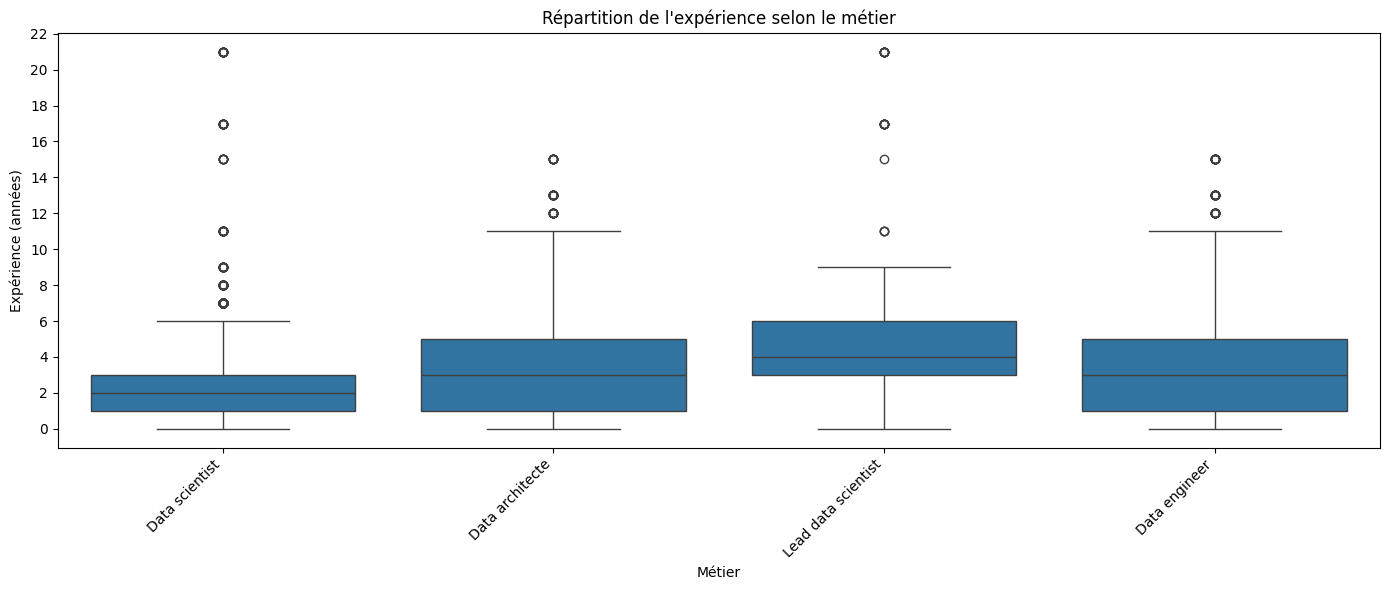

In [9]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Metier", y="Experience", data=employee_data)
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, employee_data['Experience'].max() + 2, 2), ha='right')
plt.title("Répartition de l'expérience selon le métier")
plt.xlabel("Métier")
plt.ylabel("Expérience (années)")
plt.tight_layout()
plt.show()

In [10]:

metiers = employee_data['Metier'].unique()
resultats = []

for metier in metiers:
    vals = employee_data.loc[employee_data['Metier'] == metier, 'Experience'].dropna()
    total = len(vals)
    if total == 0:
        continue
    q1 = np.percentile(vals, 25)
    q3 = np.percentile(vals, 75)
    median = np.median(vals)
    iqr = q3 - q1
    lower_whisker = max(vals[vals >= q1 - 1.5 * iqr].min(), vals.min())
    upper_whisker = min(vals[vals <= q3 + 1.5 * iqr].max(), vals.max())
    outliers = vals[(vals < lower_whisker) | (vals > upper_whisker)]
    min_val = vals.min()
    max_val = vals.max()
    mean_val = vals.mean()
    
    percent_outliers = (len(outliers) / total) * 100 
    
    resultats.append({
        'Metier': metier,
        'Min': min_val,
        'Q1': q1,
        'Moyenne': mean_val,
        'Médiane': median,
        'Q3': q3,
        'Tige basse': lower_whisker,
        'Tige haute': upper_whisker,
        'Max': max_val,
        'Nb outliers': len(outliers),
        'Total': total,
        'Pourcentage outliers (%)': percent_outliers,
    })

boxplots_data = pd.DataFrame(resultats)

boxplots_data

,Metier,Min,Q1,Moyenne,Médiane,Q3,Tige basse,Tige haute,Max,Nb outliers,Total,Pourcentage outliers (%)
0,Data scientist,0.0,1.0,2.677448,2.0,3.0,0.0,6.0,21.0,234,2226,10.512129
1,Data architecte,0.0,1.0,3.482116,3.0,5.0,0.0,11.0,15.0,54,1342,4.023845
2,Lead data scientist,0.0,3.0,4.818432,4.0,6.0,0.0,9.0,21.0,21,727,2.888583
3,Data engineer,0.0,1.0,3.536619,3.0,5.0,0.0,11.0,15.0,62,1461,4.243669


L'observation de ces boxplots montre qu'une grande partie des data scientists ont entre 1 et 3 ans d'expérience avec une médiane centrée autour de 2 ans, tandis que les lead data scientist se situent en majorité entre 3 et 6 ans d'expérience avec une médiane autour de 4 ans.
Beaucoup de profils de data scientists (234 sur 2226 soit 10%) sont des outliers en terme d'expérience, tandis que pour les lead data scientists il y en a beaucoup moins.

Les Data engineers sont des profils majoritairement situés entre 1 et 5 ans d'expérience, avec une médiane a 3 ans et 62 data engineers sur 1461 soit 4%

Les Data architects ont majoritairement entre 1 et 5 années d'expérience avec une médiane autour de 3 années et les plus expérimentés ont entre 11 et 15 ans d'expérience, avec 4% d'outliers.

## 3. Proposez une approche pour gérer les valeurs manquantes de la variable Expérience.

Les employés n'ayant pas renseigné la variable Experience auront par défaut la médiane associée a leur métier. En effet, les distributions d'experience en fonction des métiers sont différentes c'est pourquoi on choisit de le faire par métier et on choisit la médiane car elle est plus robuste aux outliers. 

## 4. Quelles sont les 5 technologies les plus couramment utilisées ? Proposez une visualisation.

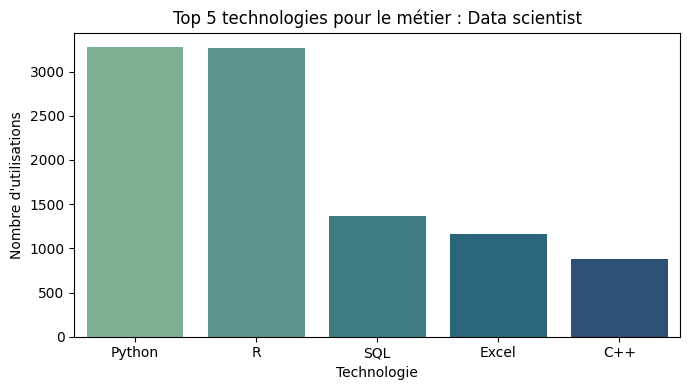

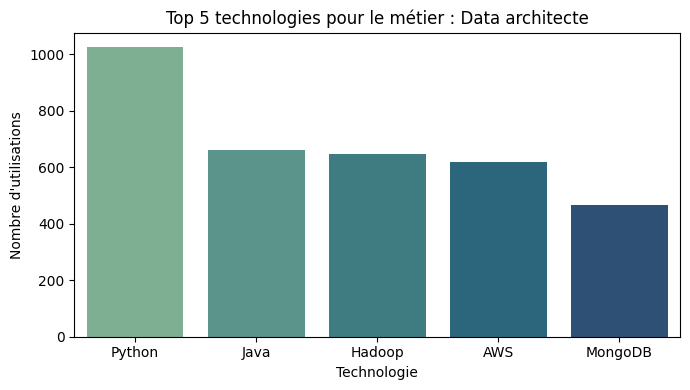

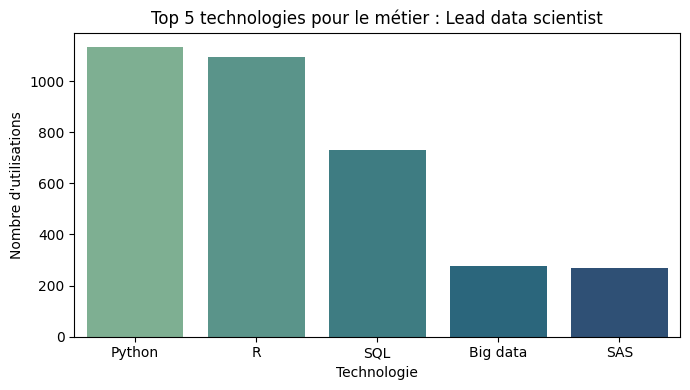

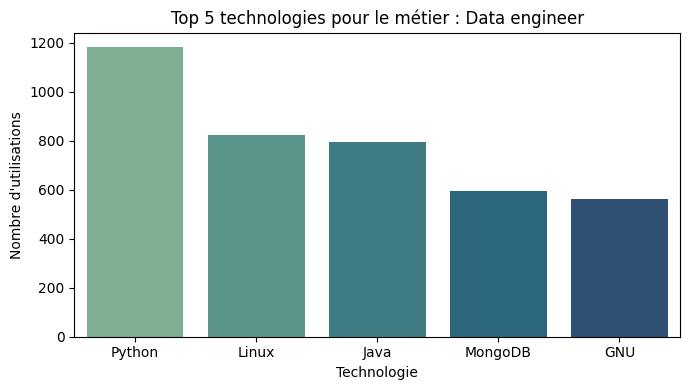

In [11]:
# Top 5 technologies par métier

from collections import Counter

metiers = employee_data['Metier'].dropna().unique()
top_techs_by_metier = {}

for metier in metiers:
    techs = employee_data.loc[employee_data['Metier'] == metier, 'Technologies'].dropna()
    all_techs = []
    for t in techs:
        all_techs.extend([tech.strip() for tech in t.split('/') if tech.strip() != ''])
    counter = Counter(all_techs)
    top_techs_by_metier[metier] = counter.most_common(5)

# Affichage et visualisation pour chaque métier
for metier, top_techs in top_techs_by_metier.items():
    tech_names, tech_counts = zip(*top_techs) if top_techs else ([], [])
    plt.figure(figsize=(7, 4))
    sns.barplot(x=list(tech_names), y=list(tech_counts), hue = list(tech_names),  palette="crest")
    plt.title(f"Top 5 technologies pour le métier : {metier}")
    plt.ylabel("Nombre d'utilisations")
    plt.xlabel("Technologie")
    plt.tight_layout()
    plt.show()

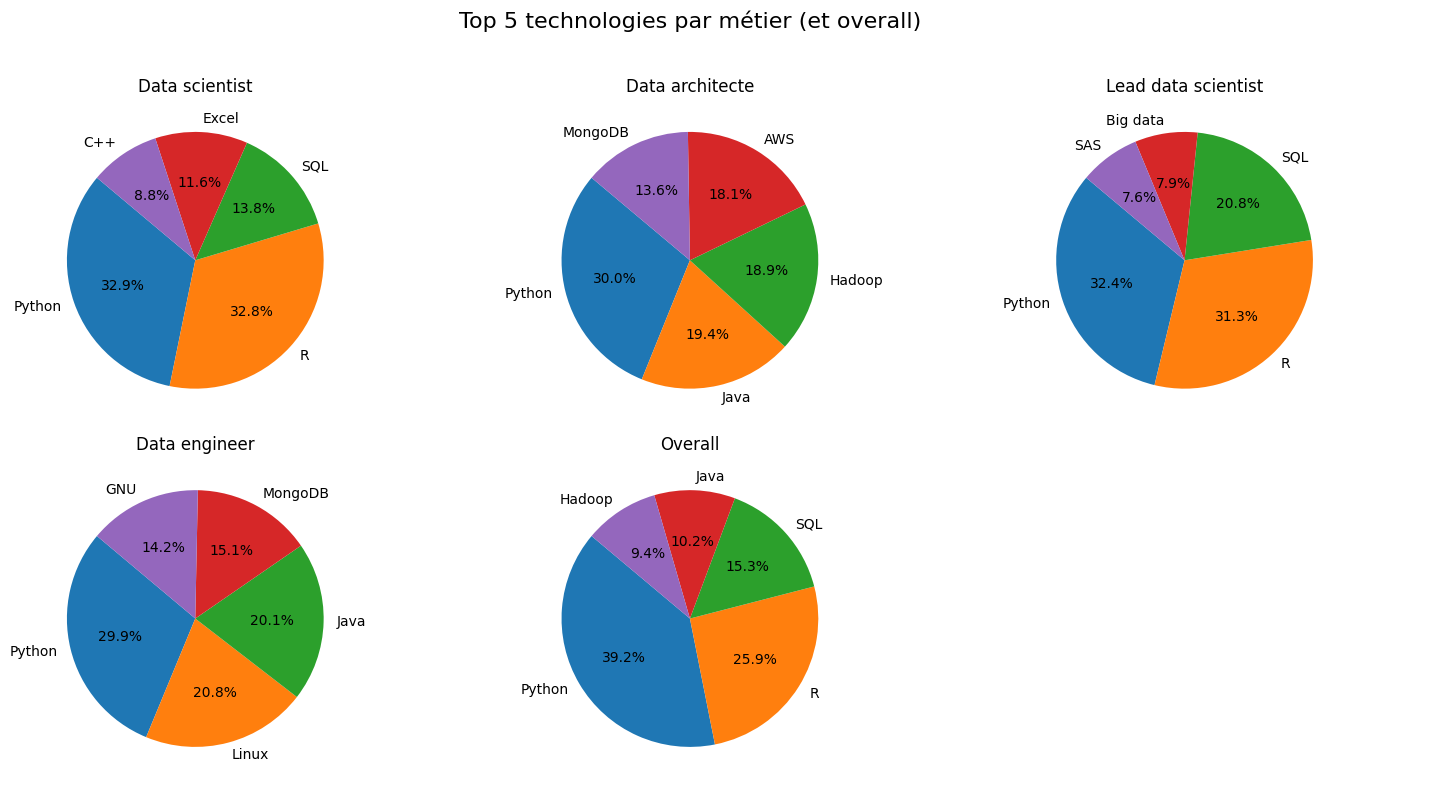

In [12]:
# Top 5 technologies par métier + overall, en camembert (pie chart) avec subplots

from collections import Counter

metiers = employee_data['Metier'].dropna().unique()
top_techs_by_metier = {}

# Calcul des top 5 par métier
for metier in metiers:
    techs = employee_data.loc[employee_data['Metier'] == metier, 'Technologies'].dropna()
    all_techs = []
    for t in techs:
        all_techs.extend([tech.strip() for tech in t.split('/') if tech.strip() != ''])
    counter = Counter(all_techs)
    top_techs_by_metier[metier] = counter.most_common(5)

# Calcul des top 5 overall
all_techs = []
for t in employee_data['Technologies'].dropna():
    all_techs.extend([tech.strip() for tech in t.split('/') if tech.strip() != ''])
overall_counter = Counter(all_techs)
overall_top5 = overall_counter.most_common(5)
top_techs_by_metier['Overall'] = overall_top5

# Préparation des subplots
n_metiers = len(top_techs_by_metier)
ncols = 3
nrows = int(np.ceil(n_metiers / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))

axes = axes.flatten()

for idx, (metier, top_techs) in enumerate(top_techs_by_metier.items()):
    tech_names, tech_counts = zip(*top_techs) if top_techs else ([], [])
    axes[idx].pie(tech_counts, labels=tech_names, autopct='%1.1f%%', startangle=140)
    axes[idx].set_title(f"{metier}")

# Masquer les axes inutilisés
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Top 5 technologies par métier (et overall)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [13]:
employee_data['Metier'].value_counts()/ len(employee_data) * 100

Metier
Data scientist         40.336047
Data engineer          24.493843
Data architecte        22.156126
Lead data scientist    12.815696
Name: count, dtype: float64

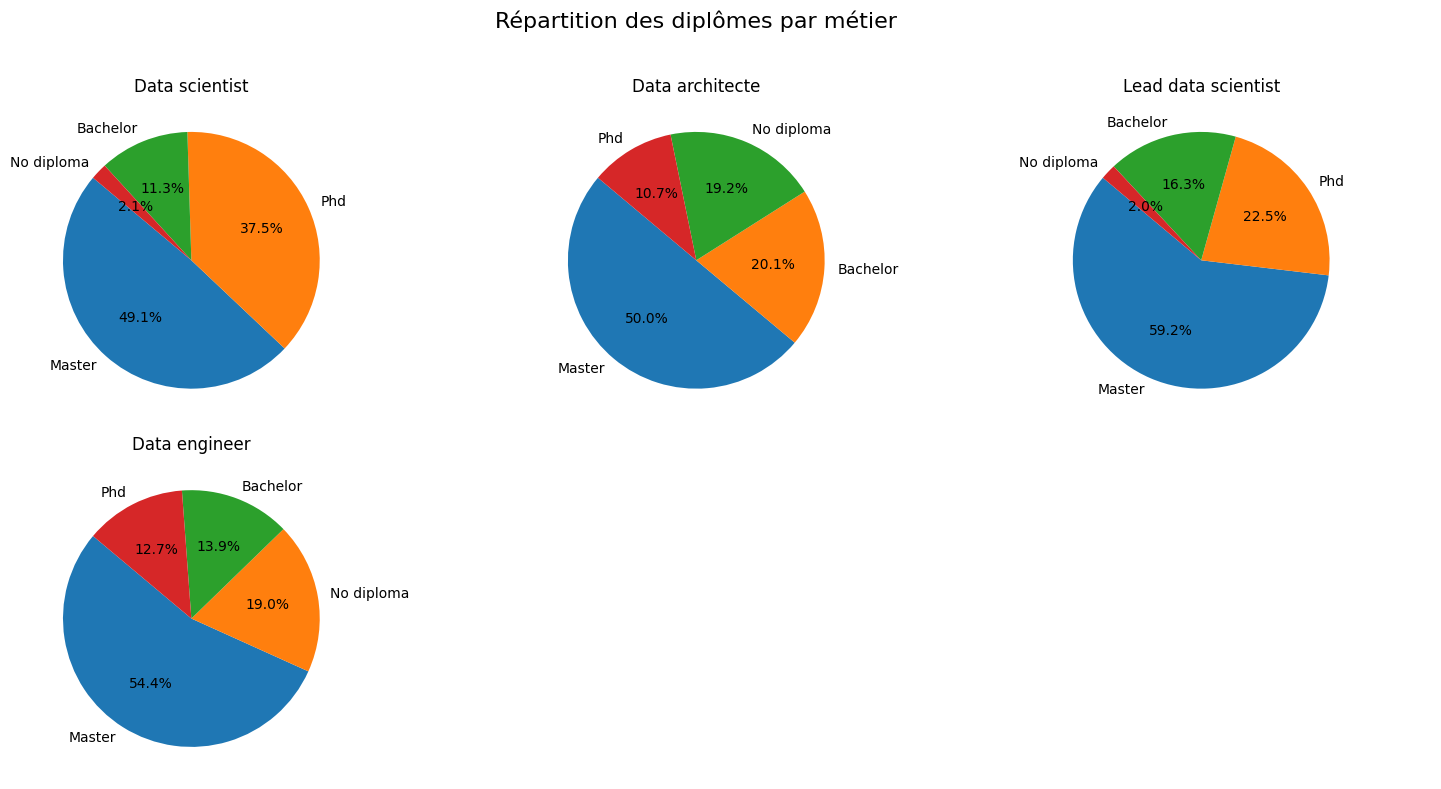

In [78]:
metiers = employee_data['Metier'].dropna().unique()
n_metiers = len(metiers)
ncols = 3
nrows = int(np.ceil(n_metiers / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
axes = axes.flatten()

for idx, metier in enumerate(metiers):
    diplome_counts = (
        employee_data[employee_data['Metier'] == metier]['Diplome']
        .value_counts()
        .sort_values(ascending=False)
    )
    axes[idx].pie(
        diplome_counts.values,
        labels=diplome_counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    axes[idx].set_title(metier)

# Masquer les axes inutilisés
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Répartition des diplômes par métier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Feature Engineering

## 1. Transformez la variable Expérience en variable catégorielle ayant ces 4 modalités : débutant, confirmé, senior et expert. Expliquez votre démarche.

On commence par split le dataset avant de commencer le feature engineering afin d'éviter le leak de données.

In [14]:
employee_data.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,NaN,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

employee_data_for_split = employee_data.dropna(subset=['Metier'])

X_train, X_test, y_train, y_test = train_test_split(
    employee_data_for_split.drop(columns=['Metier']),
    employee_data_for_split['Metier'],
    test_size=0.2,
    random_state=42,
    stratify=employee_data_for_split['Metier']
)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [16]:
data = [X_train, X_test]
labels = [y_train, y_test]

In [17]:
# Fonction de catégorisation
def categorize_experience(row, quartiles_dict, global_quartiles):
    metier = row['target']
    exp = row['Experience']
    
    # Si métier absent ou inconnu, utiliser les quartiles globaux
    if pd.isnull(metier) or metier not in quartiles_dict:
        q = global_quartiles
    else:
        q = quartiles_dict[metier]
        
    if exp < q['Q1']:
        return 'débutant'
    elif exp < q['Q2']:
        return 'confirmé'
    elif exp < q['Q3']:
        return 'senior'
    else:
        return 'expert'

In [45]:
def process_data(df, labels):
        
        df['target'] = labels
        
        # Calcul des quartiles globaux
        global_quartiles = {
            'Q1': np.nanpercentile(df['Experience'], 25),
            'Q2': np.nanpercentile(df['Experience'], 50),
            'Q3': np.nanpercentile(df['Experience'], 75)
        }
        
        # Calcul des quartiles par métier
        quartiles_dict = {}
        for target in df['target'].unique():
            
            vals = df.loc[df['target'] == target, 'Experience'].values
            
            quartiles_dict[target] = {
                'Q1': np.nanpercentile(vals, 25),
                'Q2': np.nanpercentile(vals, 50),
                'Q3': np.nanpercentile(vals, 75)
            }


        # Application de la catégorisation
        df['Has_Experience_filled'] = df['Experience'].notnull()
        df['Experience_Category'] = df.apply(lambda row: categorize_experience(row, quartiles_dict, global_quartiles), axis=1)
        df['Experience_Category'].fillna('Non renseigné', inplace=True)
        
        # On applique la médiane de l'expérience par métier pour remplir les valeurs manquantes
        df['Experience'] = df.groupby('target')['Experience'].transform(lambda x: x.fillna(x.median()))
        
        
        df['Nb_Technologies'] = df['Technologies'].apply(lambda x: len(x.split('/')) if isinstance(x, str) else 0)
        df.drop(columns=['target'], inplace=True)
        
        return df
    

In [18]:
for i, (df, label) in enumerate(zip(data, labels)):
    
    df['target'] = label
    
    # Calcul des quartiles globaux
    global_quartiles = {
        'Q1': np.nanpercentile(df['Experience'], 25),
        'Q2': np.nanpercentile(df['Experience'], 50),
        'Q3': np.nanpercentile(df['Experience'], 75)
    }
    
    # Calcul des quartiles par métier
    quartiles_dict = {}
    for target in df['target'].unique():
        
        vals = df.loc[df['target'] == target, 'Experience'].values
        
        quartiles_dict[target] = {
            'Q1': np.nanpercentile(vals, 25),
            'Q2': np.nanpercentile(vals, 50),
            'Q3': np.nanpercentile(vals, 75)
        }


    # Application de la catégorisation
    df['Has_Experience_filled'] = df['Experience'].notnull()
    df['Experience_Category'] = df.apply(lambda row: categorize_experience(row, quartiles_dict, global_quartiles), axis=1)
    df['Experience_Category'].fillna('Non renseigné', inplace=True)
    
    # On applique la médiane de l'expérience par métier pour remplir les valeurs manquantes
    df['Experience'] = df.groupby('target')['Experience'].transform(lambda x: x.fillna(x.median()))
    
    
    df['Nb_Technologies'] = df['Technologies'].apply(lambda x: len(x.split('/')) if isinstance(x, str) else 0)
    df.drop(columns=['target'], inplace=True)
    
    data[i] = df
    

On a utilisé les intervalles fournis par les quantiles des boxplots associés a chaque métier. On a regroupé data scientist et lead data scientist.

## 2. Pour chaque variable qui vous semble pertinente pour les étapes suivantes, proposez une stratégie de feature engineering et justifiez votre choix.

In [19]:
## Ici on ne fait que test si les encodeurs fonctionnent, on fera un vrai pipeline par la suite

In [20]:
from sklearn.preprocessing import TargetEncoder

target_encoder = TargetEncoder(target_type='multiclass', smooth= 'auto')

entreprise_encoded_train = target_encoder.fit_transform(
    data[0][["Entreprise"]], 
    labels[0]
)

entreprise_encoded_test = target_encoder.fit_transform(
    data[1][["Entreprise"]],
    labels[1]
)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

# On définit le vectorizer en précisant le séparateur
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split('/'))

technologies_encoded_train = tfidf.fit_transform(data[0]["Technologies"])
technologies_encoded_test = tfidf.transform(data[1]["Technologies"])

In [22]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['No diploma', 'Bachelor', 'Master', 'Phd']]

ordinal_encoder = OrdinalEncoder(categories=categories)

diplome_encoded_train = ordinal_encoder.fit_transform(
    data[0][['Diplome']]
)

diplome_encoded_test = ordinal_encoder.fit_transform(
    data[1][['Diplome']]
)

In [23]:
target_encoder = TargetEncoder(target_type='multiclass', smooth= 'auto')

ville_encoded_train = target_encoder.fit_transform(
    data[0][["Ville"]], 
    labels[0]
)

ville_encoded_test = target_encoder.fit_transform(
    data[1][["Ville"]],
    labels[1]
)

On en fait un Pipeline

In [24]:
### Ici on test avec RandomForestClassifier juste pour voir si ça fonctionne

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

current_train, current_test = data[0], data[1]
current_train_target, current_test_target = labels[0], labels[1]

preprocessor = ColumnTransformer(
    transformers=[
        # Ordinal encoding du diplôme
        ('diplome_ord', OrdinalEncoder(categories=[['No diploma', 'Bachelor', 'Master', 'Phd']]), ['Diplome']),
        # Ordinal encoding de l'expérience category
        ('experience_cat_ord', OrdinalEncoder(categories=[['débutant', 'confirmé', 'senior','expert']]), ['Experience_Category']),
        # TFIDF sur Technologies
        ('tech_tfidf', tfidf, 'Technologies'),
        # Target encoding sur Entreprise
        ('entreprise_target', target_encoder, ['Entreprise']),
        # Target encoding sur Ville
        ('ville_target', target_encoder, ['Ville']),
    ],
    remainder='drop'  # ou 'passthrough' si tu veux garder d'autres colonnes
)

# 3. Pipeline complet avec un modèle (exemple RandomForest)
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 4. Exemple d'entraînement
pipeline.fit(current_train, current_train_target)

# 5. Prédiction
current_y_pred = pipeline.predict(current_test)

Creation d'une fonction pour creer un pipeline avec gridsearch 

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

def build_random_search(preprocessor, classifier, search_space, n_iter=200, cv=10, scoring='f1_weighted', verbose=0, n_jobs=-1):
    """
    Crée un objet RandomizedSearchCV pour l'optimisation d'hyperparamètres.

    Args:
        pipeline (Pipeline): Pipeline de prétraitement.
        classifier (estimator): Classifieur à optimiser.
        search_space (dict): Dictionnaire des hyperparamètres à explorer.
        n_iter (int): Nombre d'itérations de recherche.
        cv (int): Nombre de folds pour la validation croisée.
        scoring (str): Métrique de scoring.
        verbose (int): Niveau de verbosité.
        n_jobs (int): Nombre de jobs parallèles.

    Returns:
        RandomizedSearchCV: Objet prêt à être entraîné.
    """
    # On s'assure que le pipeline contient le classifieur
    full_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', classifier)
    ])
    grid = RandomizedSearchCV(
        full_pipeline,
        param_distributions=search_space,
        n_iter=n_iter,
        cv=cv,
        scoring=scoring,
        verbose=verbose,
        n_jobs=n_jobs
    )
    return grid

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluate_classification(y_test, y_pred):
    """
    Affiche l'accuracy, le rapport de classification et la matrice de confusion.
    """
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap='Blues',
        xticklabels=np.unique(y_test), yticklabels=np.unique(y_test)
    )
    plt.title("Matrice de confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités terrain")
    plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

preprocessor = ColumnTransformer(
    transformers=[
        # Ordinal encoding du diplôme
        ('diplome_ord', OrdinalEncoder(categories=[['No diploma', 'Bachelor', 'Master', 'Phd']]), ['Diplome']),
        # Ordinal encoding de l'expérience category
        ('experience_cat_ord', OrdinalEncoder(categories=[['débutant', 'confirmé', 'senior','expert']]), ['Experience_Category']),
        # TFIDF sur Technologies
        ('tech_tfidf', tfidf, 'Technologies'),
        # Target encoding sur Entreprise
        ('entreprise_target', target_encoder, ['Entreprise']),
        # Target encoding sur Ville
        ('ville_target', target_encoder, ['Ville']),
        ('keep_has_filled_exp', 'passthrough', ['Has_Experience_filled']),
        ('keep_nb_tech', 'passthrough', ['Nb_Technologies'])
    ],
    remainder='drop'  # ou 'passthrough' si tu veux garder d'autres colonnes
)

current_train, current_test = data[0], data[1]
current_train_target, current_test_target = labels[0], labels[1]

# Définition de l'espace de recherche
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__max_depth': range(3, 10),
    'classifier__colsample_bytree': [0.5, 0.7, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

xgb_model = build_random_search(
    preprocessor,
    XGBClassifier(),
    search_space,
    n_iter=200,
    cv=skf,
    scoring='f1_weighted',
    verbose=0,
    n_jobs=-1
)

# 4. Exemple d'entraînement
xgb_model.fit(current_train, current_train_target)

# 5. Prédiction
current_y_pred = xgb_model.predict(current_test)

Accuracy: 0.9053842132775745
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       1.00      1.00      1.00       469
           2       0.85      0.93      0.89       773
           3       0.71      0.49      0.58       246

    accuracy                           0.91      1913
   macro avg       0.89      0.85      0.86      1913
weighted avg       0.90      0.91      0.90      1913



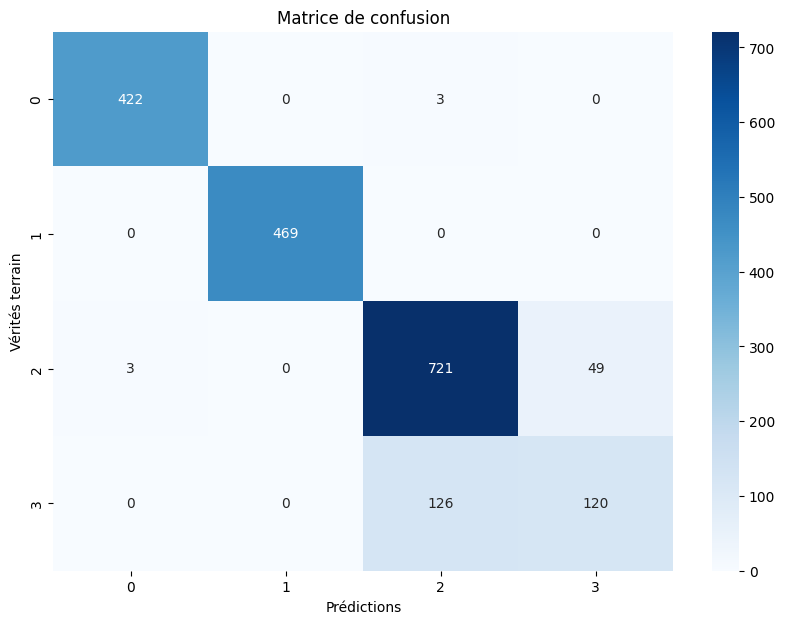

In [34]:
evaluate_classification(current_test_target, current_y_pred)

In [35]:
xgb_model.best_params_

{'classifier__n_estimators': 100,
 'classifier__max_depth': 4,
 'classifier__learning_rate': 0.3,
 'classifier__gamma': 0,
 'classifier__colsample_bytree': 1.0}

                Feature  Importance
42        tech_tfidf__r    0.151436
27   tech_tfidf__matlab    0.091094
23    tech_tfidf__linux    0.068037
52  tech_tfidf__tableau    0.059508
18     tech_tfidf__hdfs    0.052772
..                  ...         ...
44     tech_tfidf__ruby    0.000000
48  tech_tfidf__scoring    0.000000
57  tech_tfidf__windows    0.000000
56  tech_tfidf__vertica    0.000000
58     tech_tfidf__yarn    0.000000

[69 rows x 2 columns]


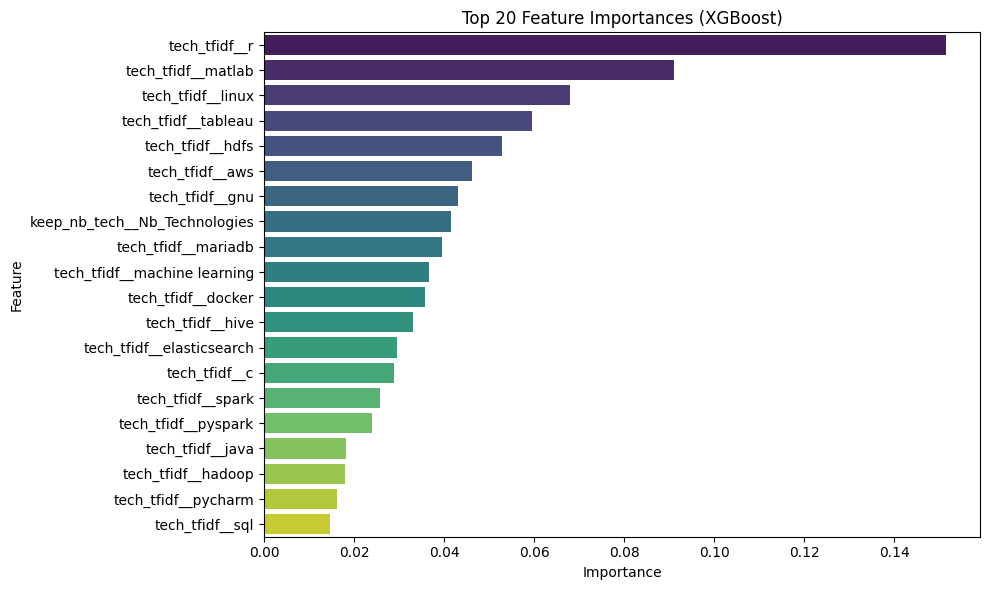

In [38]:
importances = xgb_model.best_estimator_.named_steps['classifier'].feature_importances_

# Récupérer les noms des features après transformation
feature_names = []
try:
    # Pour ColumnTransformer, get_feature_names_out existe depuis sklearn 1.0+
    feature_names = xgb_model.best_estimator_.named_steps['preprocessing'].get_feature_names_out()
except Exception:
    # Fallback: noms génériques
    feature_names = [f'feature_{i}' for i in range(len(importances))]

# Création d'un DataFrame pour trier les importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Affichage tabulaire
print(importances_df)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

In [ ]:
## Majorité des colonnes concernent les technologies, c'est normal car c'est ce qui détermine le plus le métier (logique, c'est question de compétences)
## Il est difficile de faire la différence entre un data scientist et un lead data scientist, ils ont souvent les mêmes compétences et certains data scientists ont une expérience plus grande que certains lead data scientists
## Il faudrait faire en sorte que le modele se concentre plus sur la variable d'experience et la variable de diplome

In [46]:
processed_employee_data = process_data(employee_data, employee_data['Metier'])

In [54]:
processed_employee_data.loc[processed_employee_data['Metier'].isnull(),'Metier'] = le.inverse_transform(xgb_model.predict(processed_employee_data[processed_employee_data['Metier'].isnull()]))

# Clustering

In [62]:
processed_employee_data.head(1)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Has_Experience_filled,Experience_Category,Nb_Technologies
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris,True,confirmé,5


In [61]:
from collections import Counter

# Transforme la colonne en listes
tech_lists = processed_employee_data['Technologies'].apply(lambda x: x.split('/') if isinstance(x, str) else [])

# Aplatit toutes les listes en une seule
all_techs = [tech.strip() for sublist in tech_lists for tech in sublist if tech.strip()]

# Compte les occurrences
tech_counter = Counter(all_techs)

# Affiche le nombre d'occurrences pour chaque technologie
print("Nombre d'occurrences par technologie :")
for tech, count in tech_counter.most_common():
    print(f"{tech}: {count}")

# Nombre de technologies uniques
print(f"\nNombre de technologies uniques : {len(tech_counter)}")

Nombre d'occurrences par technologie :
Python: 6627
R: 4374
SQL: 2581
Java: 1719
Hadoop: 1589
Excel: 1398
C++: 1381
Spark: 1240
Linux: 1183
MongoDB: 1166
VBA: 1003
machine learning: 996
SAS: 943
Docker: 927
Matlab: 871
Hive: 864
Tensorflow: 848
Elasticsearch: 826
Big data: 824
C: 739
Kibana: 728
AWS: 691
GNU: 677
Teradata: 610
scikit-learn: 476
Machine learning: 458
Anglais: 458
Pyspark: 448
HDFS: 361
SPSS: 359
Microsoft Azure: 338
MariaDB: 335
Scikit-learn: 313
Scala: 310
Cassandra: 284
Matplotlib: 273
AI: 250
Scoring: 250
Vertica: 250
Tableau: 250
Pycharm: 235
Kafka: 235
NoSQL: 232
Deep learning: 227
PostgreSQL: 208
Yarn: 206
Map-Reduce: 155
PIG: 155
HBASE: 155
PySpark: 145
anglais: 145
numpy: 140
Redshift: 124
NoSQ: 123
Hadoop(HDFS): 98
ORACLE: 94
MySQL: 94
Windows: 75
Perl: 74
Ruby: 35

Nombre de technologies uniques : 60


In [64]:
processed_employee_data.isnull().sum()

Entreprise               17
Metier                    0
Technologies              0
Diplome                   0
Experience               19
Ville                     0
Has_Experience_filled     0
Experience_Category       0
Nb_Technologies           0
dtype: int64

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

clustered_employee_data = processed_employee_data.copy().dropna()

# 1. Préparation du préprocesseur
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['Experience', 'Nb_Technologies']),
    ('cat', OneHotEncoder(), ['Diplome', 'Experience_Category']),
    ('tech', TfidfVectorizer(tokenizer=lambda x: x.split('/')), 'Technologies')
])

# 2. Pipeline clustering
clustering_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('clustering', KMeans(n_clusters=5, random_state=42))
])

# 3. Entraînement du clustering
clustering_pipeline.fit(clustered_employee_data)

# 4. Attribution des clusters
clustered_employee_data['cluster'] = clustering_pipeline.named_steps['clustering'].labels_

# 5. Analyse rapide
print(clustered_employee_data['cluster'].value_counts())
print(clustered_employee_data.groupby('cluster')[['Experience', 'Nb_Technologies']].mean())

cluster
3    3076
2    2515
1    2381
0     810
4     764
Name: count, dtype: int64
         Experience  Nb_Technologies
cluster                             
0          0.139506         4.138272
1          2.631247         3.364973
2          2.434990         5.989662
3          3.137191         4.457412
4          9.651832         4.447644


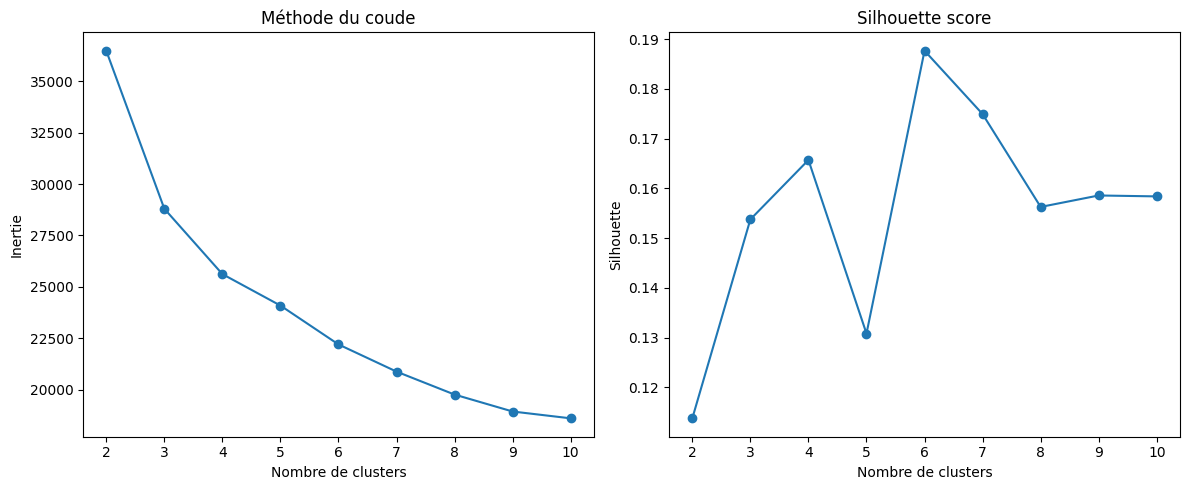

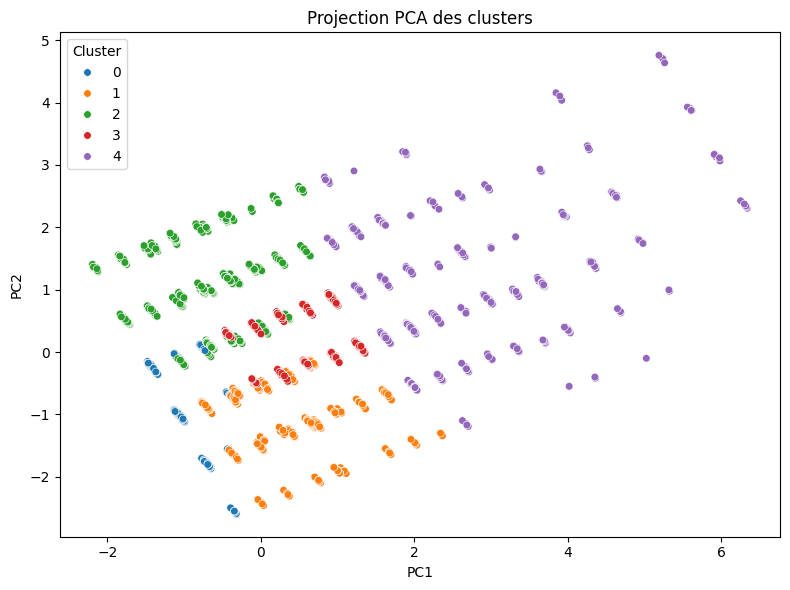


Répartition des métiers par cluster :
Metier   Data architecte  Data engineer  Data scientist  Lead data scientist
cluster                                                                     
0                   0.29           0.25            0.36                 0.10
1                   0.45           0.34            0.17                 0.04
2                   0.01           0.16            0.63                 0.20
3                   0.20           0.24            0.44                 0.12
4                   0.24           0.27            0.28                 0.21

Diplôme majoritaire par cluster :
cluster
0    Master
1    Master
2    Master
3    Master
4    Master
Name: Diplome, dtype: object

Expérience moyenne et Nb_Technologies moyen par cluster :
         Experience  Nb_Technologies
cluster                             
0              0.14             4.14
1              2.63             3.36
2              2.43             5.99
3              3.14             4.46
4        

In [66]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

# 1. Choix du nombre de clusters : méthode du coude et silhouette
inertia = []
silhouette = []
K_range = range(2, 11)
for k in K_range:
    kmeans = Pipeline([
        ('preprocessing', preprocessor),
        ('clustering', KMeans(n_clusters=k, random_state=42))
    ])
    kmeans.fit(clustered_employee_data)
    inertia.append(kmeans.named_steps['clustering'].inertia_)
    labels = kmeans.named_steps['clustering'].labels_
    silhouette.append(silhouette_score(
        kmeans.named_steps['preprocessing'].transform(clustered_employee_data), labels))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette, marker='o')
plt.title("Silhouette score")
plt.xlabel("Nombre de clusters")
plt.ylabel("Silhouette")
plt.tight_layout()
plt.show()

# 2. Visualisation des clusters avec PCA
X_transformed = preprocessor.fit_transform(clustered_employee_data)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_transformed)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clustered_employee_data['cluster'], palette='tab10', s=30)
plt.title("Projection PCA des clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# 3. Analyse de la composition des clusters
print("\nRépartition des métiers par cluster :")
print(clustered_employee_data.groupby('cluster')['Metier'].value_counts(normalize=True).unstack().fillna(0).round(2))

print("\nDiplôme majoritaire par cluster :")
print(clustered_employee_data.groupby('cluster')['Diplome'].agg(lambda x: x.value_counts().idxmax()))

print("\nExpérience moyenne et Nb_Technologies moyen par cluster :")
print(clustered_employee_data.groupby('cluster')[['Experience', 'Nb_Technologies']].mean().round(2))


Top 10 technologies pour PC1 (par valeur absolue du loading) :
sas : -0.030
r : -0.029
machine learning : -0.029
teradata : -0.023
anglais : -0.023
java : 0.019
elasticsearch : 0.018
spark : 0.018
matlab : -0.017
docker : 0.017

Top 10 technologies pour PC2 (par valeur absolue du loading) :
sas : 0.067
machine learning : 0.059
teradata : 0.055
anglais : 0.054
r : 0.049
sql : 0.045
spark : -0.039
java : -0.038
elasticsearch : -0.034
linux : -0.034


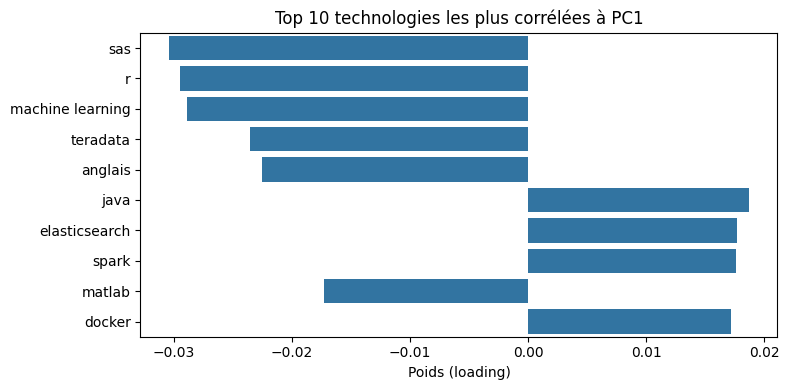

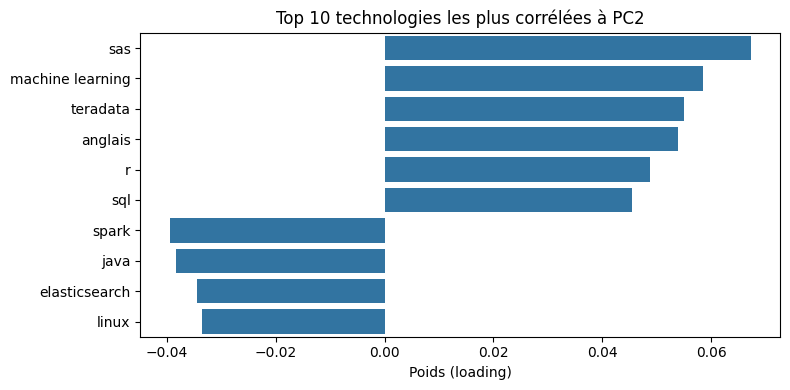

In [68]:
# 1. Récupérer les noms des features après transformation
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split('/'))
preprocessor.fit(clustered_employee_data)
feature_names = (
    preprocessor.named_transformers_['tech'].get_feature_names_out()
    if hasattr(preprocessor.named_transformers_['tech'], 'get_feature_names_out')
    else []
)

# 2. Indices des features TF-IDF dans la matrice transformée
# On suppose que les features TF-IDF sont à la fin (car ajoutées après num et cat)
n_num = preprocessor.transformers_[0][2].__len__()
n_cat = preprocessor.named_transformers_['cat'].get_feature_names_out().shape[0]
n_tfidf = len(feature_names)
tfidf_start = n_num + n_cat
tfidf_end = tfidf_start + n_tfidf

# 3. Coefficients PCA pour TF-IDF
tfidf_pca_loadings = pca.components_[:, tfidf_start:tfidf_end]

# 4. Top mots/technos pour PC1 et PC2
for i, pc in enumerate(['PC1', 'PC2']):
    top_idx = np.argsort(np.abs(tfidf_pca_loadings[i]))[::-1][:10]
    print(f"\nTop 10 technologies pour {pc} (par valeur absolue du loading) :")
    for idx in top_idx:
        print(f"{feature_names[idx]} : {tfidf_pca_loadings[i, idx]:.3f}")

# Optionnel : visualisation barplot
import matplotlib.pyplot as plt
import seaborn as sns

for i, pc in enumerate(['PC1', 'PC2']):
    top_idx = np.argsort(np.abs(tfidf_pca_loadings[i]))[::-1][:10]
    plt.figure(figsize=(8,4))
    sns.barplot(
        x=tfidf_pca_loadings[i][top_idx],
        y=[feature_names[j] for j in top_idx],
        orient='h'
    )
    plt.title(f"Top 10 technologies les plus corrélées à {pc}")
    plt.xlabel("Poids (loading)")
    plt.tight_layout()
    plt.show()

In [69]:
from kneed import KneeLocator

kneedle = KneeLocator(
    K_range, inertia, curve='convex', direction='decreasing'
)
optimal_k_elbow = kneedle.elbow
print(f"Nombre optimal de clusters (méthode du coude) : {optimal_k_elbow}")

Nombre optimal de clusters (méthode du coude) : 4


In [70]:
optimal_k_silhouette = K_range[np.argmax(silhouette)]
print(f"Nombre optimal de clusters (silhouette score) : {optimal_k_silhouette}")

Nombre optimal de clusters (silhouette score) : 6


Accuracy: 0.9419759539989545
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       425
           1       1.00      1.00      1.00       469
           2       0.92      0.94      0.93       773
           3       0.81      0.76      0.78       246

    accuracy                           0.94      1913
   macro avg       0.93      0.92      0.93      1913
weighted avg       0.94      0.94      0.94      1913



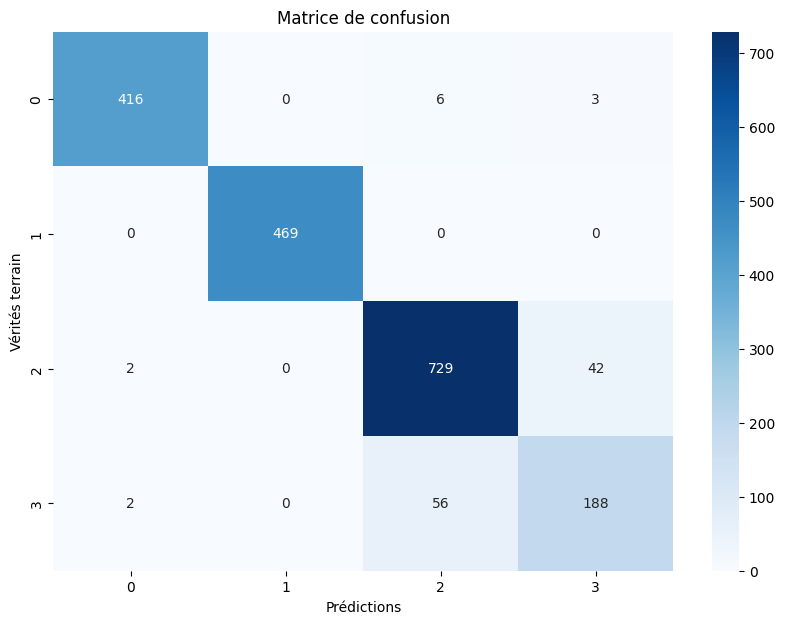

In [25]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# 6. Évaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille d’hyperparamètres
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Création du GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

# Lancement de la recherche
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score de validation croisée :", grid_search.best_score_)

/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-pa

Meilleurs paramètres : {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Meilleur score de validation croisée : 0.9327820488313081


Accuracy: 0.9393622582331417
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       1.00      1.00      1.00       469
           2       0.91      0.95      0.93       773
           3       0.84      0.70      0.76       246

    accuracy                           0.94      1913
   macro avg       0.93      0.91      0.92      1913
weighted avg       0.94      0.94      0.94      1913



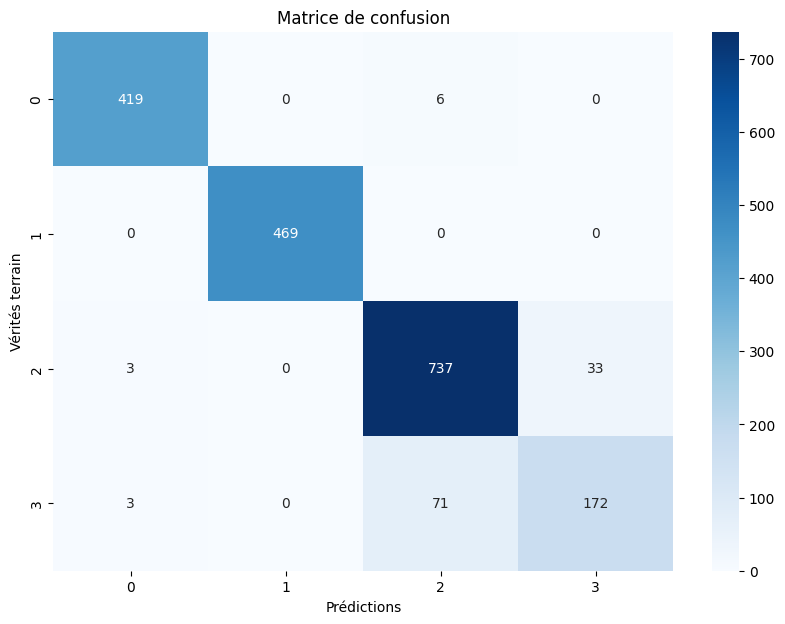

In [27]:
grid_search.best_estimator_

# Prédiction avec le meilleur modèle

y_pred_best = grid_search.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

In [28]:
from xgboost import XGBClassifier

preprocessor = ColumnTransformer(
    transformers=[
        # Imputation de l'expérience
        ('exp_imputer', median_imputer, ['Experience']),
        # Ordinal encoding du diplôme
        ('diplome_ord', ordinal_encoder, ['Diplome']),
        # TFIDF sur Technologies
        ('tech_tfidf', tfidf, 'Technologies'),
        # Target encoding sur Entreprise
        ('entreprise_target', target_encoder, ['Entreprise']),
        # Target encoding sur Ville
        ('ville_target', target_encoder, ['Ville']),
    ],
    remainder='drop'  # ou 'passthrough' si tu veux garder d'autres colonnes
)

# 3. Pipeline complet avec un modèle (exemple RandomForest)
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier())
])

# 4. Exemple d'entraînement
pipeline.fit(X_train, y_train)

# 5. Prédiction
y_pred = pipeline.predict(X_test)

Accuracy: 0.9487715629900679
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       425
           1       1.00      1.00      1.00       469
           2       0.94      0.94      0.94       773
           3       0.82      0.80      0.81       246

    accuracy                           0.95      1913
   macro avg       0.94      0.93      0.93      1913
weighted avg       0.95      0.95      0.95      1913



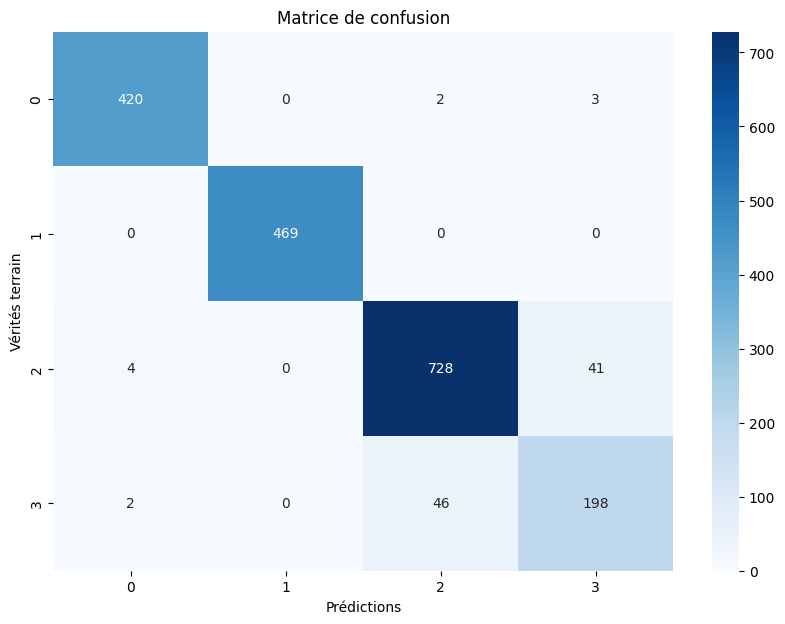

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

In [30]:
X_train

,Entreprise,Technologies,Diplome,Experience,Ville,Experience_Category,nb_technos
9094,Jacobs,MongoDB/SQL/Docker,Master,3.0,Marseille,Non renseigné,3
6141,Cambridge Consultants Ltd,Java/Hadoop/HDFS/Yarn,No diploma,3.0,Nantes,Non renseigné,4
1910,The Laso Corp,VBA/Python/Excel/R,Master,2.0,Bordeaux,senior,4
4127,Allstate,Matlab/C/C++/Python/Scikit-learn,Phd,2.0,Paris,Non renseigné,5
3245,Ball Aerospace,Java/Hadoop/HDFS/Yarn,Master,1.0,Lyon,confirmé,4
...,...,...,...,...,...,...,...
6287,Ball Aerospace,Spark/Python/Scala,No diploma,0.0,Lyon,débutant,3
3476,Conversant Media,MariaDB/MongoDB/NoSQ/SQL/Hadoop/Hive,No diploma,3.0,Paris,Non renseigné,6
6012,University of Colorado Boulder,Docker/GNU/Windows/Linux/Python,Master,0.0,Bordeaux,débutant,5
604,National Ecological Observatory Network Inc,Java/AWS/Elasticsearch/Kibana,Master,3.0,Paris,Non renseigné,4


In [ ]:
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# ... Assure-toi que median_imputer, ordinal_encoder, tfidf, target_encoder sont définis ...

preprocessor = ColumnTransformer(
    transformers=[
        ('exp_imputer', median_imputer, ['Experience']),
        ('diplome_ord', ordinal_encoder, ['Diplome']),
        ('tech_tfidf', tfidf, 'Technologies'),
        ('entreprise_target', target_encoder, ['Entreprise']),
        ('ville_target', target_encoder, ['Ville']),
        (('exp_category_target', target_encoder, ['Experience_Category'])),
    ],
    remainder='passthrough' 
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier())
])

# Définition de l'espace de recherche
search_space = {
    'classifier__n_estimators': [50, 100, 150, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__max_depth': range(3, 10),
    'classifier__colsample_bytree': [0.5, 0.7, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}

grid = RandomizedSearchCV(
    pipeline,
    param_distributions=search_space,
    n_iter=200,
    cv=10,
    scoring='f1_weighted',
    verbose=0,
    n_jobs=-1
)

# Entraînement
model = grid.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

Accuracy: 0.9576581285938317
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       425
           1       1.00      1.00      1.00       469
           2       0.94      0.96      0.95       773
           3       0.87      0.81      0.84       246

    accuracy                           0.96      1913
   macro avg       0.95      0.94      0.95      1913
weighted avg       0.96      0.96      0.96      1913



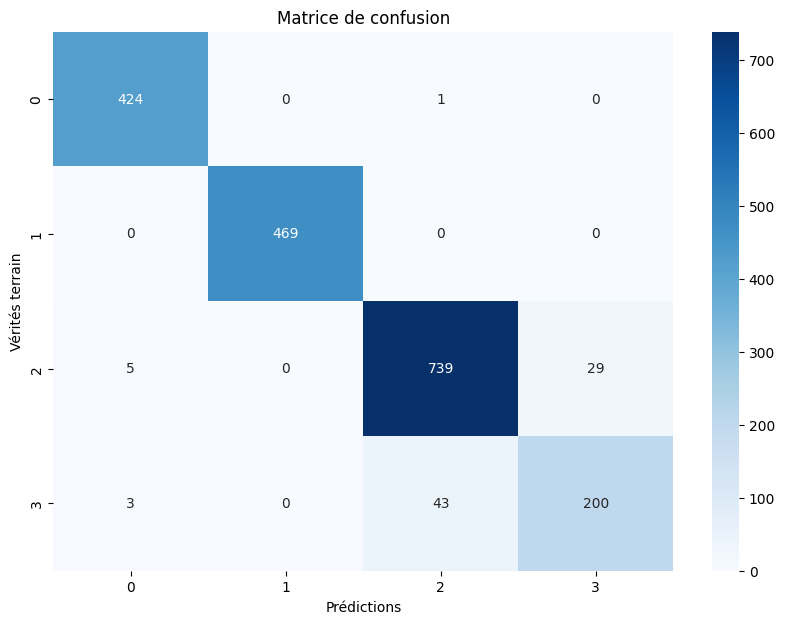

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/jc/workspace/equancy_technical_assessment/.venv/lib/python3.12/site-pa

Accuracy: 0.8891792995295348
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       425
           1       1.00      1.00      1.00       469
           2       0.82      0.94      0.87       773
           3       0.69      0.38      0.49       246

    accuracy                           0.89      1913
   macro avg       0.87      0.82      0.83      1913
weighted avg       0.88      0.89      0.88      1913



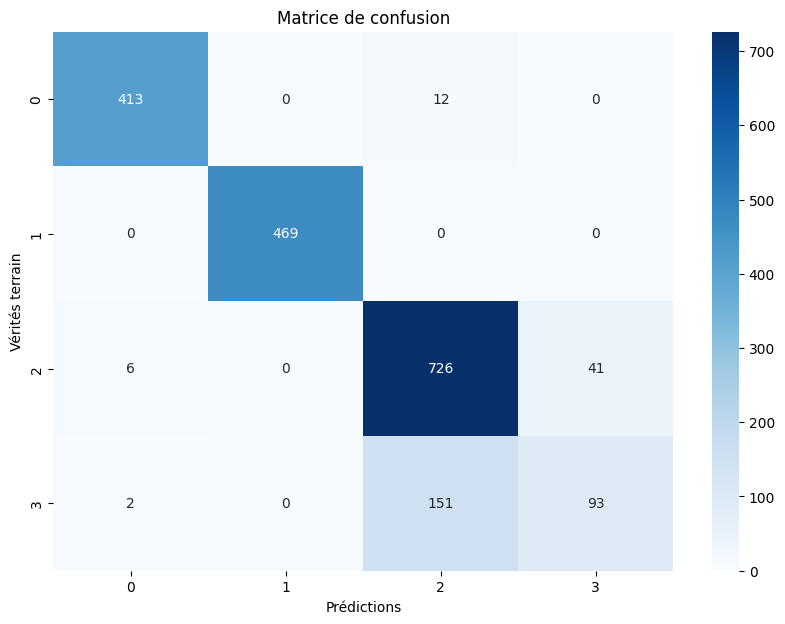

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# ... Assure-toi que median_imputer, ordinal_encoder, tfidf, target_encoder sont définis ...

preprocessor = ColumnTransformer(
    transformers=[
        ('exp_imputer', median_imputer, ['Experience']),
        ('diplome_ord', ordinal_encoder, ['Diplome']),
        ('tech_tfidf', tfidf, 'Technologies'),
        ('entreprise_target', target_encoder, ['Entreprise']),
        ('ville_target', target_encoder, ['Ville']),
        ('exp_category_target', target_encoder, ['Experience_Category']),
    ],
    remainder='passthrough' 
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

search_space = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['lbfgs', 'liblinear']
}

grid = RandomizedSearchCV(
    pipeline,
    param_distributions=search_space,
    n_iter=10,
    cv=10,
    scoring='f1_weighted',
    verbose=0,
    n_jobs=-1
)

# Entraînement
model = grid.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()